<a href="https://colab.research.google.com/github/faisalalshahrani101/faisal/blob/main/project_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Data Processing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.shape

(301, 9)

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


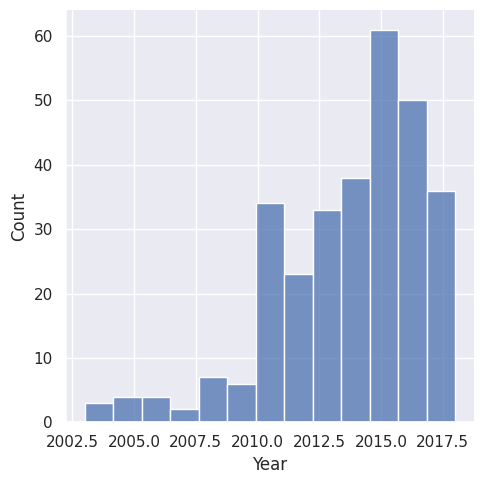

In [ ]:
sns.displot(df['Year'])

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
Car_Name_le = LabelEncoder()
df["Car_Name"] = Car_Name_le.fit_transform(df["Car_Name"])


In [ ]:
Fuel_Type_le = LabelEncoder()
df["Fuel_Type"] = Fuel_Type_le.fit_transform(df["Fuel_Type"])


In [ ]:
Seller_Type_le = LabelEncoder()
df["Seller_Type"] = Seller_Type_le.fit_transform(df["Seller_Type"])


In [ ]:
Transmission_le = LabelEncoder()
df["Transmission"] = Transmission_le.fit_transform(df["Transmission"])


In [ ]:
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


liner regression

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:

y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 1.2142339415047012
Mean Squared Error: 3.5347190697129736
Root Mean Squared Error: 1.8800848570511315
R2 Score: 0.8465539666857806


RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor



In [ ]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"R oot Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 0.6257721311475416
Mean Squared Error: 0.9904416267213122
R oot Mean Squared Error: 0.9952093381401282
R2 Score: 0.9570038422142529


In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel="linear")
model.fit(X_train,y_train)

SVR(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 1.2900698248596123
Mean Squared Error: 4.262144655225693
Root Mean Squared Error: 2.064496223107636
R2 Score: 0.8149756238452945


DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 0.6324590163934425
Mean Squared Error: 1.0496065573770492
Root Mean Squared Error: 1.0245030782662632
R2 Score: 0.9544354276553073


kmean

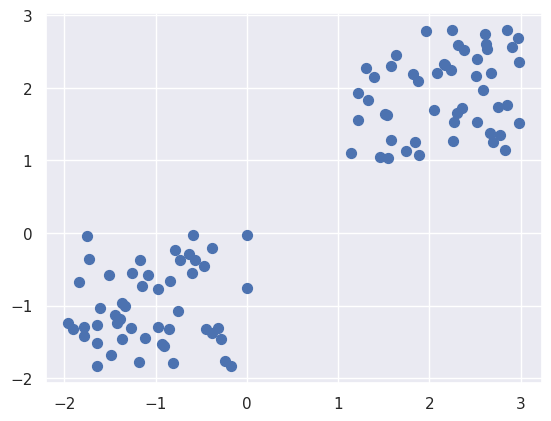

In [56]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c ='b')
plt.show()

In [58]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [59]:
Kmean.cluster_centers_

array([[-1.04955514, -1.00800973],
       [ 2.16691788,  1.9235933 ]])

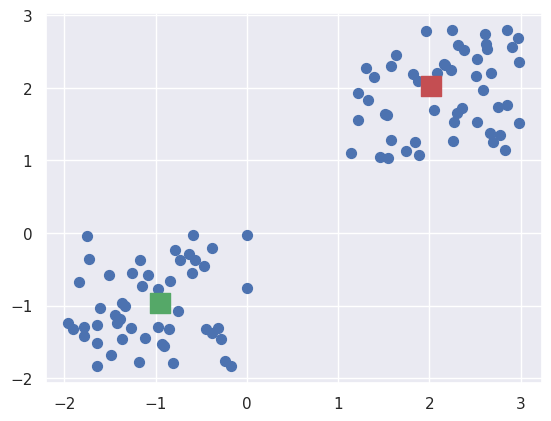

In [60]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

In [61]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [62]:
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([0], dtype=int32)

linear regression

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
X = df.iloc[:, 0:1].values
y = df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

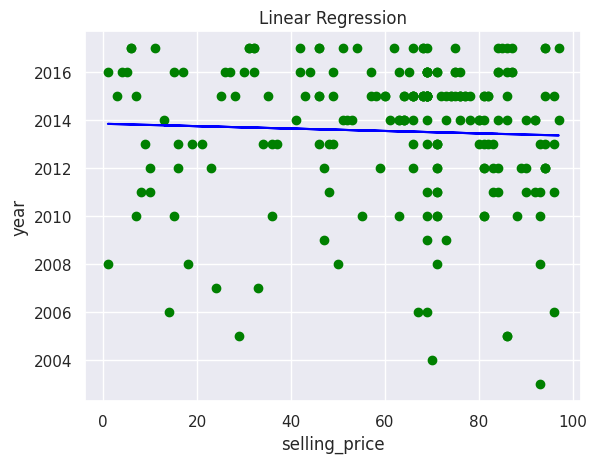

In [81]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, LinReg.predict(X_train), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('selling_price')
plt.ylabel('year')
plt.show()

polynomial regression

In [ ]:
polynom = PolynomialFeatures(degree = 2)
X_polynom = polynom.fit_transform(X_train)
X_polynom

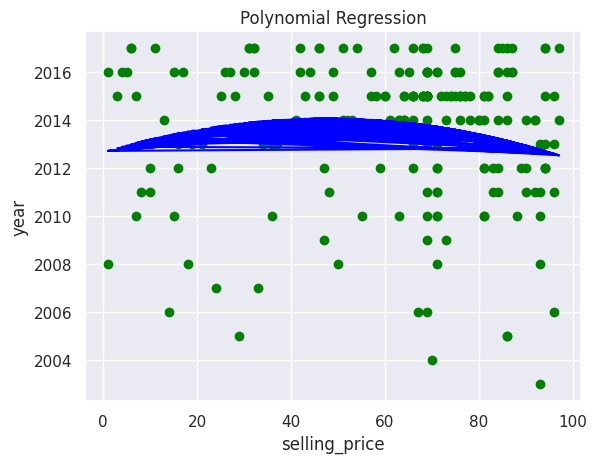

In [80]:
PolyReg = LinearRegression()
PolyReg.fit(X_polynom, y_train)
# Visualise the Polynomial Regression Results
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, PolyReg.predict(polynom.fit_transform(X_train)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('selling_price')
plt.ylabel('year')
plt.show()

In [82]:
y_predict_slr = LinReg.predict(X_test)
r_square = metrics.r2_score(y_test, y_predict_slr)
print('R-Square Error associated with Simple Linear Regression:',r_square)

R-Square Error associated with Simple Linear Regression: -0.028360297613292396


In [83]:
y_predict_pr = PolyReg.predict(polynom.fit_transform(X_test))
r_square = metrics.r2_score(y_test, y_predict_pr)
print('R-Square Error associated with Polynomial Regression is:',r_square)

R-Square Error associated with Polynomial Regression is: -0.0020321982358824098


In [84]:
LinReg.predict([[53]])

array([2013.58568117])

In [85]:
PolyReg.predict(polynom.fit_transform([[53]]))

array([2014.04960661])

corallition

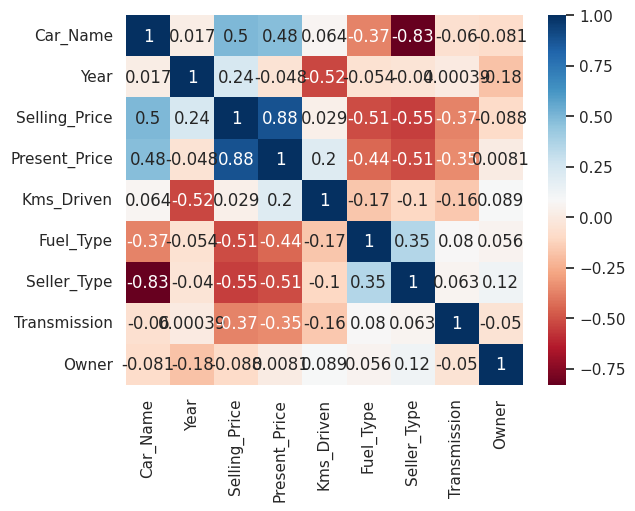

In [87]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()